# Dataset Analysis
In this notebook, the cleaned version of the dataset with extended annotation is being analyzed.

In [2]:
import pandas as pd

# read the xlsx data into a pandas dataframe
df = pd.read_excel('../data/ReferenceErrorDetection_data_extended_annotation.xlsx')

In [3]:
df

,Source,Citing Article ID,Citing Article DOI,Citing Article Title,Citing Article Retracted,Citing Article Downloaded,Domain,Citation ID,Statement with Citation,Corrected Statement,...,Reference Article DOI,Reference Article Title,Reference Article Abstract,Reference Article PDF Available,Reference Article Retracted,Reference Article Downloaded,Label,Explanation,Error Type,Added
0,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,cit001_1,Others have aimed to reduce irreversibility or...,Others have aimed to reduce irreversibility or...,...,10.1155/2021/2087027,A Fault Analysis Method for Three-Phase Induct...,The fault prediction and abductive fault diagn...,Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No
1,PubPeer,c001,10.1016/j.est.2021.103553,Heating a residential building using the heat ...,Yes,Yes,Engineering,cit001_2,Some researchers have also studied various hea...,Some researchers have also studied various hea...,...,10.1016/j.physa.2018.12.031,Develop 24 dissimilar ANNs by suitable archite...,The artificial neural network optimization met...,Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No
2,PubPeer,c002,10.1155/2022/4601350,Oxidative Potential and Nanoantioxidant Activi...,Yes,Yes,Chemistry,cit002_1,The relative content of total flavonoids in th...,The relative content of total flavonoids in th...,...,10.1088/1742-6596/1937/1/012038,Lipid Data Acquisition for devices Treatment o...,"Recently, the widespread deployment of smart p...",Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No
3,PubPeer,c003,10.1155/2022/2408685,The Choice of Anesthetic Drugs in Outpatient H...,Yes,Yes,Medicine,cit003_1,Research has shown that remimazolam tosylate e...,Research has shown that remimazolam tosylate e...,...,10.1186/s12871-018-0543-3,"Effect of propofol on breast cancer cell, the ...",Breast cancer is the second leading cause of c...,Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No
4,PubPeer,c004,10.1155/2022/4783847,A Fault-Tolerant Structure for Nano-Power Comm...,Yes,Yes,Engineering,cit004_1,if the efficiency of the routing algorithm is ...,If the efficiency of the routing algorithm is ...,...,10.36410/jcpr.2022.23.3.312,Analysis and research hotspots of ceramic mate...,"From the perspective of scientometrics, comb t...",Yes,No,Yes,Unsubstantiated,Irrelevant,Irrelevant,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"Smith & Cumberledge, 2020",c174,10.1073/pnas.1705768114,Dual role of mitochondria in producing melaton...,No,Yes,Biology,cit174_2,"However, recent identification of GPCRs on int...","However, recent identification of GPCRs on int...",...,10.1038/nature12000,Conformational biosensors reveal GPCR signalli...,A long-held tenet of molecular pharmacology is...,Yes,No,Yes,Substantiated,NaN,NaN,No
246,"Smith & Cumberledge, 2020",c175,10.1038/ncomms15218,Fast oxygen diffusion and iodide defects media...,No,Yes,Chemistry,cit175_1,The impact of film microstructure on charge ca...,The impact of film microstructure on charge ca...,...,10.1063/1.4889845,Role of the crystallization substrate on the p...,We have fabricated CH3NH3PbI3−xClx perovskite ...,Yes,No,Yes,Substantiated,NaN,NaN,No
247,"Smith & Cumberledge, 2020",c176,10.1038/ncomms16007,Muscle-specific CRISPR/Cas9 dystrophin gene ed...,No,Yes,Medicine,cit176_1,Mutations in the dystrophin (DMD) gene result ...,Mutations in the dystrophin (DMD) gene result ...,...,10.1038/345315a0,Deficiency of a glycoprotein component of the ...,"Dystrophin, the protein encoded by the Duchenn...",Yes,No,Yes,Substantiated,NaN,NaN,No
248,"Smith & Cumberledge, 2020",c177,10.1038/ncomms15081,Single-cell RNA-seq enables comprehensive tumo...,No,Yes,Medicine,cit177_1,Single-cell genome analysis is expected to hav...,Single-cell genome analysis is expected to hav...,...,10.1101/gr.191098.115,The first five years of single-cell cancer gen...,Single-cell sequencing (SCS) is a powerfu

In [4]:
%run ../scripts/data_visualisations.py

## General Data Fields

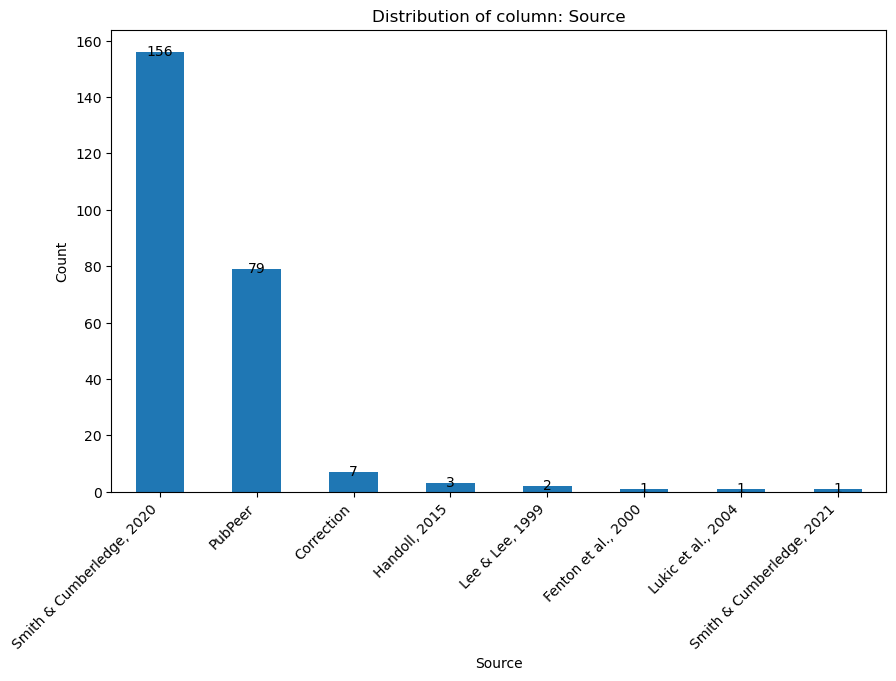

In [5]:
show_distribution(df, "Source")

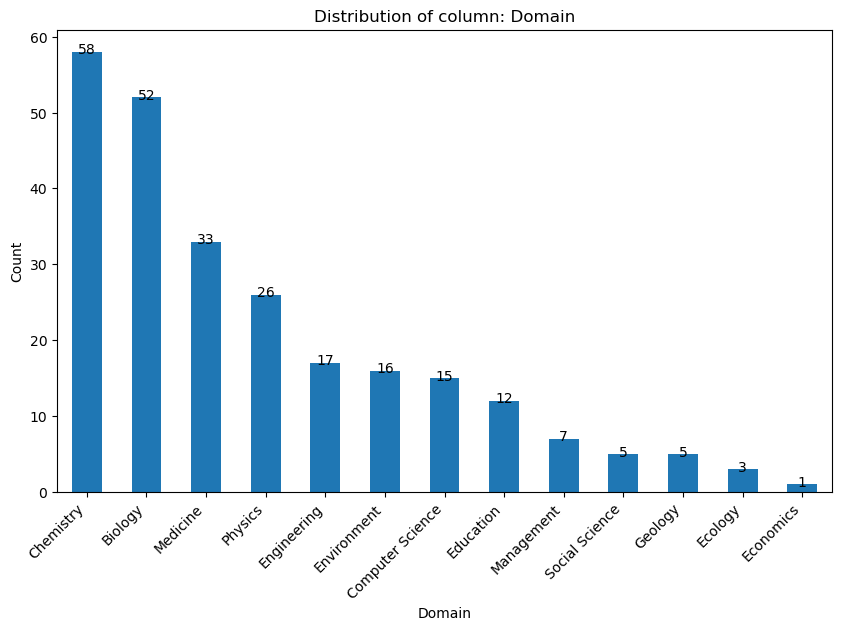

In [6]:
show_distribution(df, "Domain")

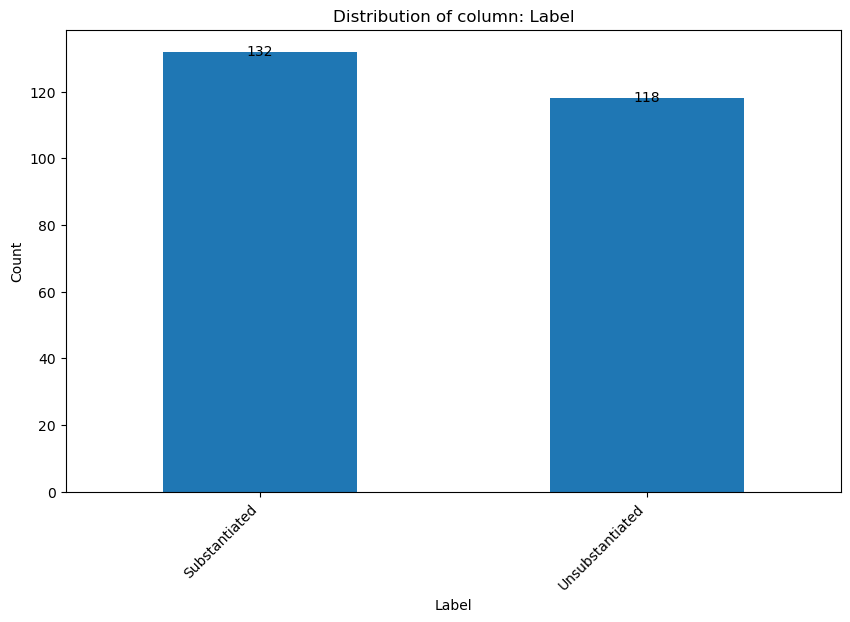

In [7]:
show_distribution(df, "Label")

In [26]:
substantiated_count = (df["Label"] == "Substantiated").sum()
unsubstantiated_count = (df["Label"] == "Unsubstantiated").sum()
total = substantiated_count + unsubstantiated_count

substantiated_pct = substantiated_count / total * 100
unsubstantiated_pct = unsubstantiated_count / total * 100

print(f"Substantiated: {substantiated_pct:.1f}%")
print(f"Unsubstantiated: {unsubstantiated_pct:.1f}%")

Substantiated: 52.8%
Unsubstantiated: 47.2%


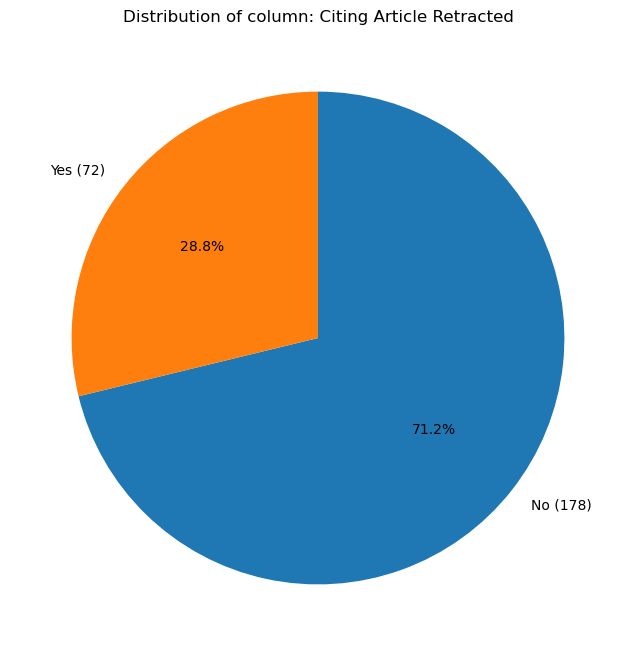

In [8]:
show_distribution_pie(df, "Citing Article Retracted")

## Added Annotations

In [19]:
def label_counts_by_column(df, column):
    """
    For each unique value in the specified column, count how often each 'Label' value occurs.
    Returns two DataFrames:
      - counts: counts of each Label as columns
      - percentages: percentage of 'Substantiated' and 'Unsubstantiated' labels
    """
    counts = df.groupby(column)['Label'].value_counts().unstack(fill_value=0)
    display(counts)
    total = counts.sum(axis=1)
    percentages = pd.DataFrame({
        'Substantiated %': round(counts.get('Substantiated', 0) / total * 100, 1),
        'Unsubstantiated %': round(counts.get('Unsubstantiated', 0) / total * 100, 1)
    })
    display(percentages)

### Reference Only

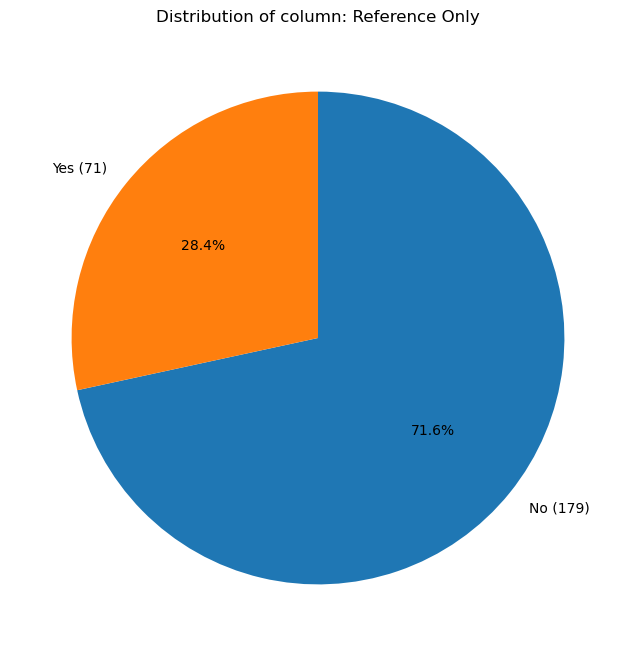

In [21]:
show_distribution_pie(df, "Reference Only")

In [22]:
label_counts_by_column(df, "Reference Only")

Label,Substantiated,Unsubstantiated
Reference Only,,
No,87,92
Yes,45,26


,Substantiated %,Unsubstantiated %
Reference Only,,
No,48.6,51.4
Yes,63.4,36.6


Within the data rows where the citation is only a reference to another paper, the relative amount of substantiated citations is higher than with more detailed citations. 

### Claim Contains Number or Formula

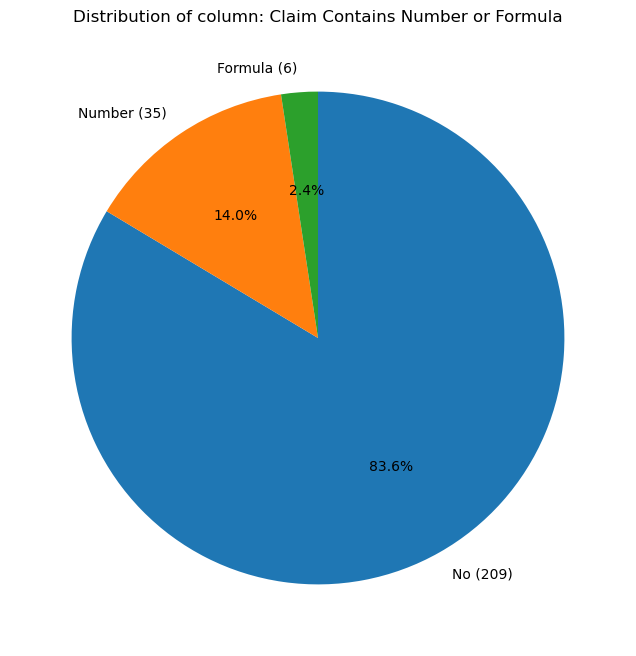

In [23]:
show_distribution_pie(df, "Claim Contains Number or Formula")

In [24]:
label_counts_by_column(df, "Claim Contains Number or Formula")

Label,Substantiated,Unsubstantiated
Claim Contains Number or Formula,,
Formula,2,4
No,110,99
Number,20,15


,Substantiated %,Unsubstantiated %
Claim Contains Number or Formula,,
Formula,33.3,66.7
No,52.6,47.4
Number,57.1,42.9


### Amount Citations in Sentence

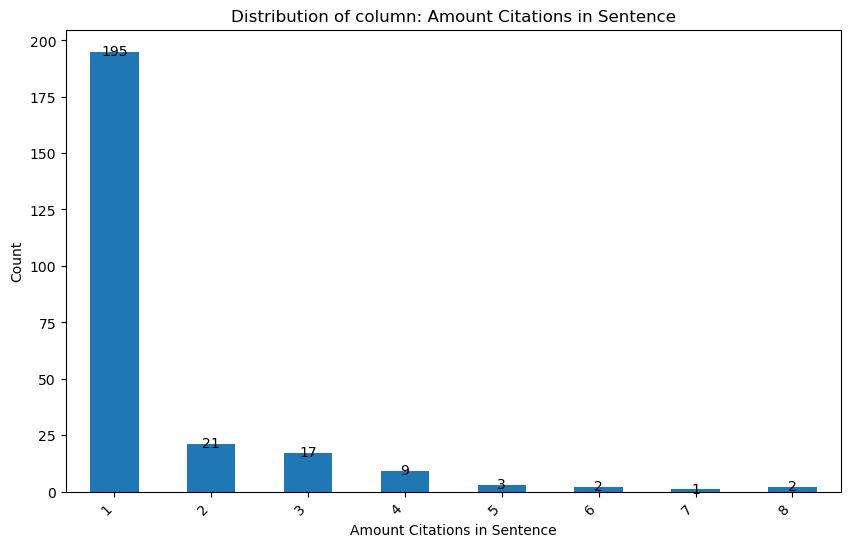

In [11]:
citation_amounts = list(df["Amount Citations in Sentence"].unique())
citation_amounts.sort()
show_distribution(df, "Amount Citations in Sentence", sorting=citation_amounts)

In [25]:
label_counts_by_column(df, "Amount Citations in Sentence")

Label,Substantiated,Unsubstantiated
Amount Citations in Sentence,,
1,90,105
2,16,5
3,13,4
4,7,2
5,3,0
6,2,0
7,1,0
8,0,2


,Substantiated %,Unsubstantiated %
Amount Citations in Sentence,,
1,46.2,53.8
2,76.2,23.8
3,76.5,23.5
4,77.8,22.2
5,100.0,0.0
6,100.0,0.0
7,100.0,0.0
8,0.0,100.0


Within this dataset, the sentences which contain multiple citations within the same sentence seem to be more likely to be substantiated?

### Amount References for Claim

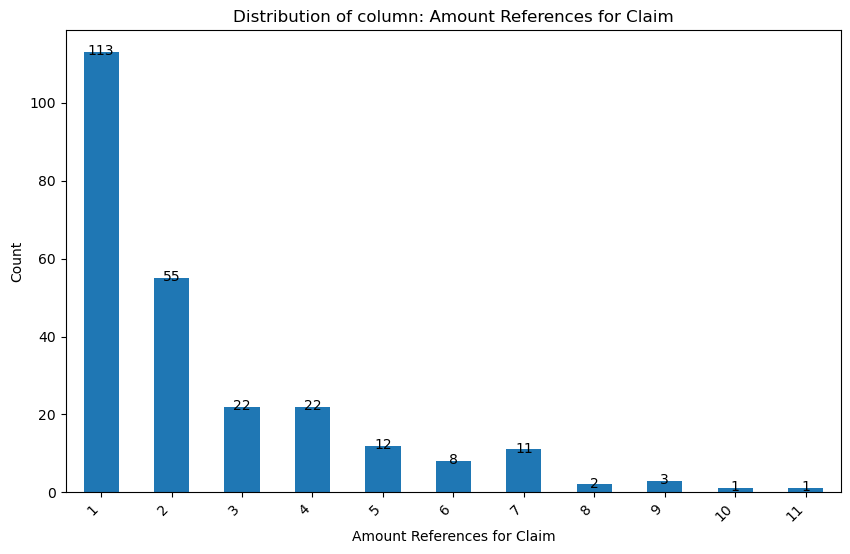

In [12]:
references_amounts = list(df["Amount References for Claim"].unique())
references_amounts.sort()
show_distribution(df, "Amount References for Claim", sorting=references_amounts)

In [27]:
label_counts_by_column(df, "Amount References for Claim")

Label,Substantiated,Unsubstantiated
Amount References for Claim,,
1,56,57
2,31,24
3,15,7
4,10,12
5,7,5
6,4,4
7,3,8
8,1,1
9,3,0


,Substantiated %,Unsubstantiated %
Amount References for Claim,,
1,49.6,50.4
2,56.4,43.6
3,68.2,31.8
4,45.5,54.5
5,58.3,41.7
6,50.0,50.0
7,27.3,72.7
8,50.0,50.0
9,100.0,0.0


Seems pretty mixed/even

### Claim Sentence Structure

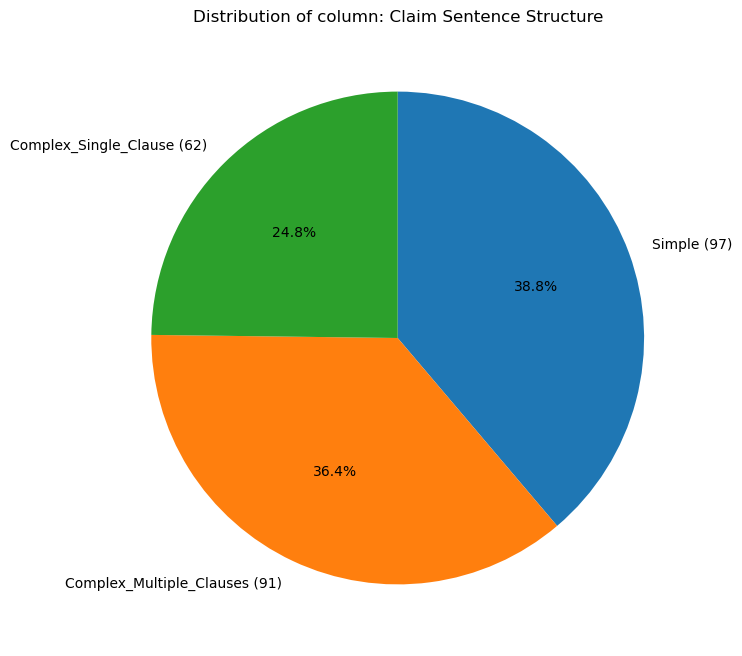

In [13]:
show_distribution_pie(df, "Claim Sentence Structure")

In [28]:
label_counts_by_column(df, "Claim Sentence Structure")

Label,Substantiated,Unsubstantiated
Claim Sentence Structure,,
Complex_Multiple_Clauses,53,38
Complex_Single_Clause,43,19
Simple,36,61


,Substantiated %,Unsubstantiated %
Claim Sentence Structure,,
Complex_Multiple_Clauses,58.2,41.8
Complex_Single_Clause,69.4,30.6
Simple,37.1,62.9


Within this dataset, the sentences which are more complex with multiple clauses seem to be more likely to be substantiated than the sentences with a simple structure?

### Amount Claims to Substantiate

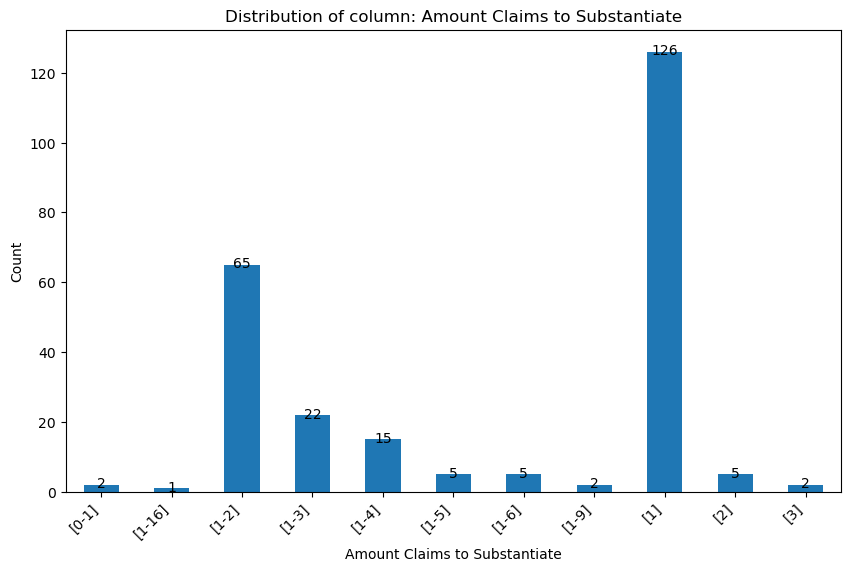

In [14]:
claims_amounts = list(df["Amount Claims to Substantiate"].unique())
claims_amounts.sort()
show_distribution(df, "Amount Claims to Substantiate", sorting=claims_amounts)


In [32]:
for idx, row in df.iterrows():
    amount_claims = row["Amount Claims to Substantiate"]
    min_amount = None
    max_amount = None

    if "-" in str(amount_claims):
        min_amount = int(amount_claims[1:amount_claims.index("-")])
        max_amount = int(amount_claims[amount_claims.index("-") + 1:-1])
    else:
        single_number = int(amount_claims[1:-1])
        min_amount = single_number
        max_amount = single_number
    
    df.at[idx, "Min Amount Claims to Substantiate"] = min_amount
    df.at[idx, "Max Amount Claims to Substantiate"] = max_amount

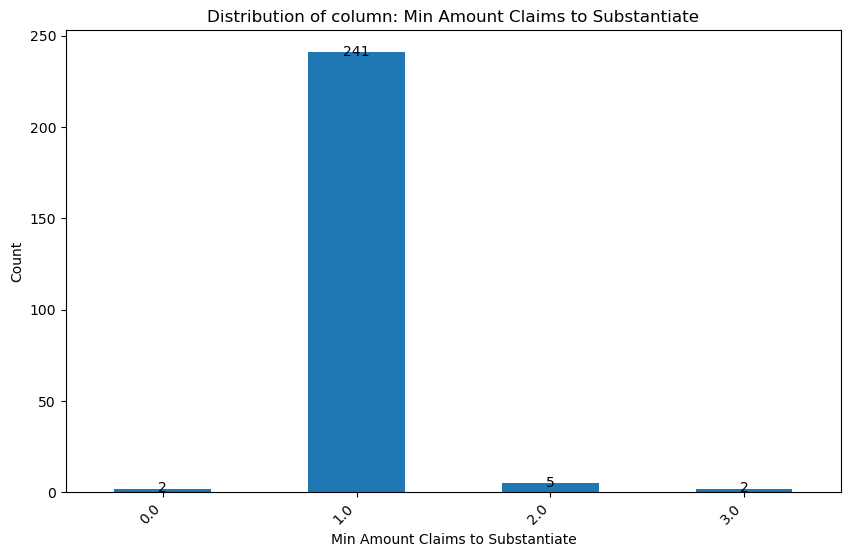

In [34]:
min_claims_amounts = list(df["Min Amount Claims to Substantiate"].unique())
min_claims_amounts.sort()
show_distribution(df, "Min Amount Claims to Substantiate", sorting=min_claims_amounts)

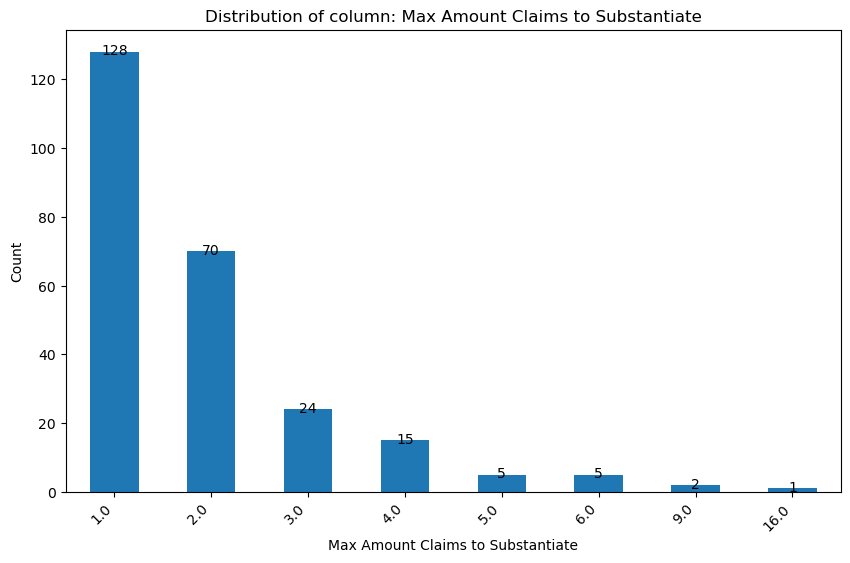

In [35]:
max_claims_amounts = list(df["Max Amount Claims to Substantiate"].unique())
max_claims_amounts.sort()
show_distribution(df, "Max Amount Claims to Substantiate", sorting=max_claims_amounts)

In [36]:
label_counts_by_column(df, "Max Amount Claims to Substantiate")

Label,Substantiated,Unsubstantiated
Max Amount Claims to Substantiate,,
1.0,75,53
2.0,31,39
3.0,13,11
4.0,9,6
5.0,1,4
6.0,3,2
9.0,0,2
16.0,0,1


,Substantiated %,Unsubstantiated %
Max Amount Claims to Substantiate,,
1.0,58.6,41.4
2.0,44.3,55.7
3.0,54.2,45.8
4.0,60.0,40.0
5.0,20.0,80.0
6.0,60.0,40.0
9.0,0.0,100.0
16.0,0.0,100.0


Seems pretty mixed

### Error Type

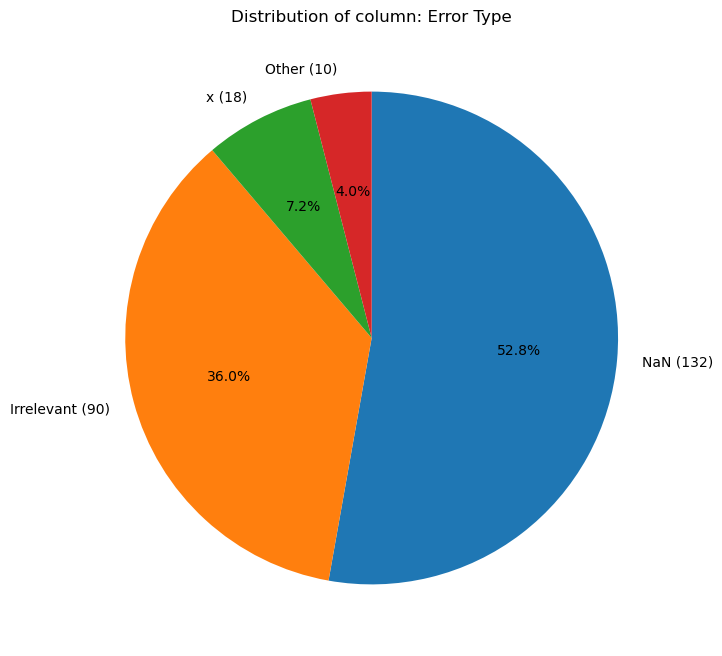

In [38]:
show_distribution_pie(df, "Error Type")

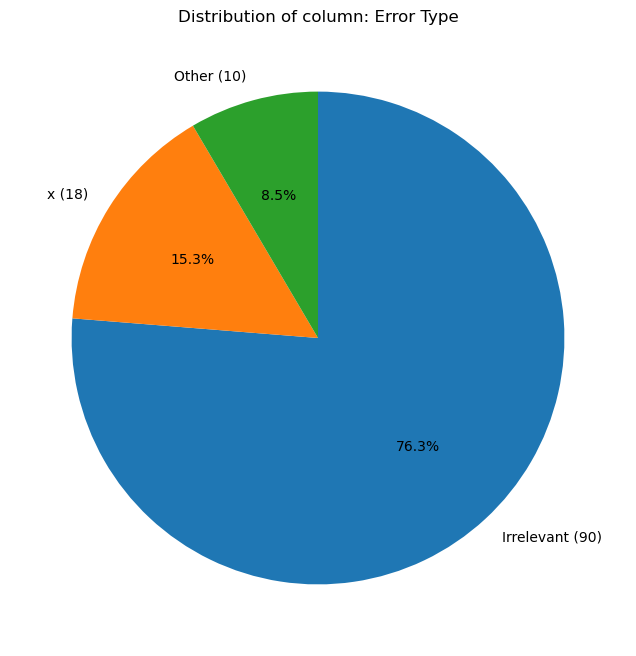

In [39]:
show_distribution_pie(df, "Error Type", include_nan=False)